# QT Analysis: Participants combined

In [2]:
# Load packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from joblib import (dump, load)

## Data preparation with session 4 as a test set

In [5]:
# Create empty lists to store the data
sad_data13 = []
anger_data13 = []
fear_data13 = []
neutral_data13 = []

# Add the data together
for x in range(1, 4):
    for y in range(1, 8):
        df_sad13 = pd.read_csv("Data/Session{}/{}/sad.csv".format(x,y))
        df_anger13 = pd.read_csv("Data/Session{}/{}/anger.csv".format(x,y))
        df_fear13 = pd.read_csv("Data/Session{}/{}/fear.csv".format(x,y))
        sad_data13.append(df_sad13)
        anger_data13.append(df_anger13)
        fear_data13.append(df_fear13)
        if x == 3:
            df_neutral13 = pd.read_csv("Data/Session{}/{}/neutral.csv".format(x,y))
            neutral_data13.append(df_neutral13)
        
# Create empty lists for session to store the data for test set
sad_data4 = []
anger_data4 = []
fear_data4 = []
neutral_data4 = []

for x in range(1, 8):
    df_sad4 = pd.read_csv("Data/Session4/{}/sad.csv".format(x))
    df_anger4 = pd.read_csv("Data/Session4/{}/anger.csv".format(x))
    df_fear4 = pd.read_csv("Data/Session4/{}/fear.csv".format(x))
    df_neutral4 = pd.read_csv("Data/Session4/{}/neutral.csv".format(x))
    sad_data4.append(df_sad4)
    anger_data4.append(df_anger4)
    fear_data4.append(df_fear4)
    neutral_data4.append(df_neutral4)

In [6]:
# Encode labels
for x in sad_data13:
    x.iloc[:, 0] = 0
    
for x in anger_data13:
    x.iloc[:, 0] = 1
    
for x in fear_data13:
    x.iloc[:, 0] = 2
    
for x in neutral_data13:
    x.iloc[:, 0] = 3
    
    # Encode labels
for x in sad_data4:
    x.iloc[:, 0] = 0
    
for x in anger_data4:
    x.iloc[:, 0] = 1
    
for x in fear_data4:
    x.iloc[:, 0] = 2
    
for x in neutral_data4:
    x.iloc[:, 0] = 3

In [7]:
# Copy the neutral data so that it will be equal to the other classes
combined_data13 = sad_data13 + anger_data13 + fear_data13 + neutral_data13
all_data13 = []

for x in combined_data13:
    for y in range(len(x.values)):
        all_data13.append(x.values[y])
        
# Copy the neutral data so that it will be equal to the other classes
combined_data4 = sad_data4 + anger_data4 + fear_data4 + neutral_data4
all_data4 = []

for x in combined_data4:
    for y in range(len(x.values)):
        all_data4.append(x.values[y])

In [8]:
# Shuffle data
random.seed(42)
random.shuffle(all_data13)
random.shuffle(all_data4)

In [ ]:
y_train = []
X_train = []
for data in all_data13:
    # Extract labels and append to y
    label = data[0]
    y_train.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_train.append(normalized)
    
y_test = []
X_test = []
for data in all_data4:
    # Extract labels and append to y
    label = data[0]
    y_test.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_test.append(normalized)

In [ ]:
# Make sure all values in the arrays are float to prevent future warnings
X_train = [np.array(x, dtype=float) for x in X_train]
X_test = [np.array(x, dtype=float) for x in X_test]

In [ ]:
# Use smote to fix imbalances
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Check if each class is equally represented in y_train
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for x in y_train:
    if x == 0:
        count0 += 1
    elif x == 1:
        count1 += 1
    elif x == 2:
        count2 += 1
    elif x == 3:
        count3 += 1

print(f"Label 0: {count0}")
print(f"Label 1: {count1}")
print(f"Label 2: {count2}")
print(f"Label 3: {count3}")

## Train models with session 4 as test set

### Logistic Regression

In [48]:
param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg"]}

lr = LogisticRegression(random_state=42, max_iter=5000)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'solver': 'newton-cg'}


In [9]:
lr = LogisticRegression(random_state=42, max_iter=5000, solver="newton-cg")
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr = lr.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.52043269 0.53577871 0.53156945 0.52615755 0.52796152]
Mean accuracy: 0.5283799840418151
Test set accuracy: 0.36183261183261184
              precision    recall  f1-score   support

         sad       0.21      0.16      0.18       693
       anger       0.48      0.45      0.46       693
        fear       0.36      0.40      0.37       693
     neutral       0.37      0.44      0.41       693

    accuracy                           0.36      2772
   macro avg       0.35      0.36      0.36      2772
weighted avg       0.35      0.36      0.36      2772



Confusion matrix, without normalization
[[112 239 113 229]
 [147 309 137 100]
 [142  89 275 187]
 [131   6 249 307]]
Normalized confusion matrix
[[0.16161616 0.34487734 0.16305916 0.33044733]
 [0.21212121 0.44588745 0.1976912  0.14430014]
 [0.2049062  0.12842713 0.3968254  0.26984127]
 [0.18903319 0.00865801 0.35930736 0.44300144]]


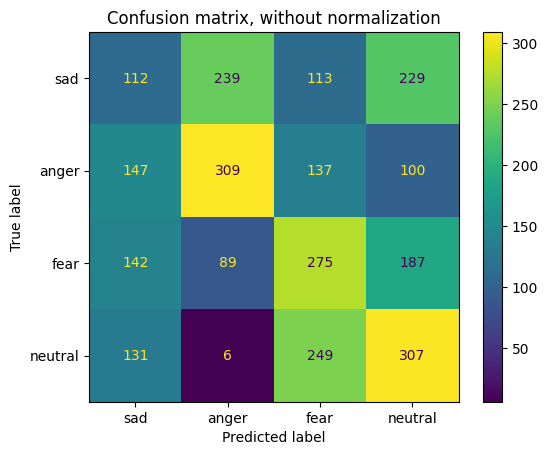

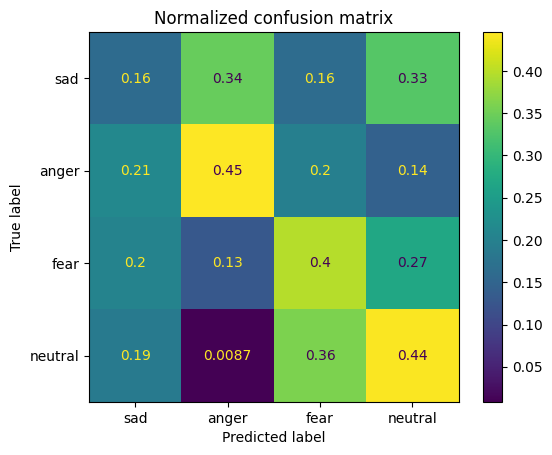

In [50]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest

In [51]:
param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 300}


In [11]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=300)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.98257212 0.98616957 0.98376428 0.98196031 0.97955502]
Mean accuracy: 0.9828042607197371
Test set accuracy: 0.31277056277056275
              precision    recall  f1-score   support

         sad       0.31      0.32      0.31       693
       anger       0.37      0.35      0.36       693
        fear       0.18      0.16      0.17       693
     neutral       0.36      0.42      0.39       693

    accuracy                           0.31      2772
   macro avg       0.31      0.31      0.31      2772
weighted avg       0.31      0.31      0.31      2772



Confusion matrix, without normalization
[[220 120 154 199]
 [267 245  54 127]
 [206 185 108 194]
 [ 12 111 276 294]]
Normalized confusion matrix
[[0.31746032 0.17316017 0.22222222 0.28715729]
 [0.38528139 0.35353535 0.07792208 0.18326118]
 [0.2972583  0.26695527 0.15584416 0.27994228]
 [0.01731602 0.16017316 0.3982684  0.42424242]]


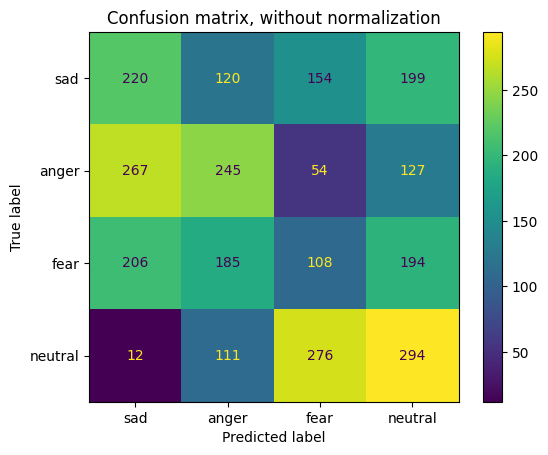

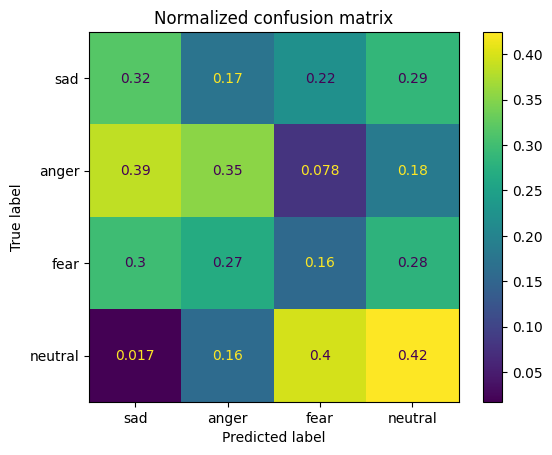

In [53]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Multi-layer perceptron 

In [54]:
param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [13]:
# Multi-layer perceptron 
mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.0001, hidden_layer_sizes=(5,2), max_iter=50000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Cross-validation scores: [0.41225962 0.65063139 0.65544197 0.67227901 0.64521948]
Mean accuracy: 0.6071662946944818
Test set accuracy: 0.2756132756132756
              precision    recall  f1-score   support

         sad       0.22      0.63      0.33       693
       anger       0.00      0.00      0.00       693
        fear       0.25      0.07      0.11       693
     neutral       0.45      0.40      0.42       693

    accuracy                           0.28      2772
   macro avg       0.23      0.28      0.22      2772
weighted avg       0.23      0.28      0.22      2772



Confusion matrix, without normalization
[[438   2  35 218]
 [647   0   1  45]
 [559   4  48  82]
 [306   0 109 278]]
Normalized confusion matrix
[[0.63203463 0.002886   0.05050505 0.31457431]
 [0.93362193 0.         0.001443   0.06493506]
 [0.80663781 0.00577201 0.06926407 0.11832612]
 [0.44155844 0.         0.15728716 0.4011544 ]]


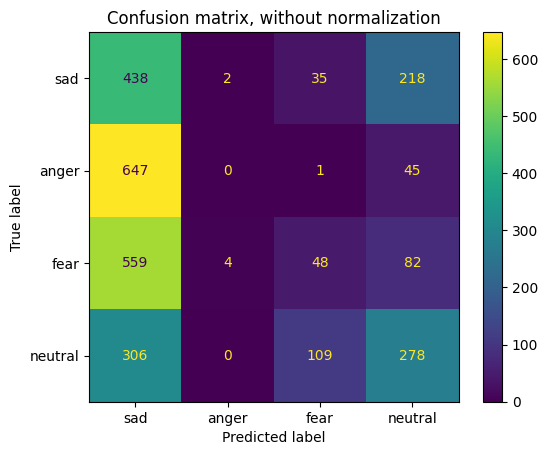

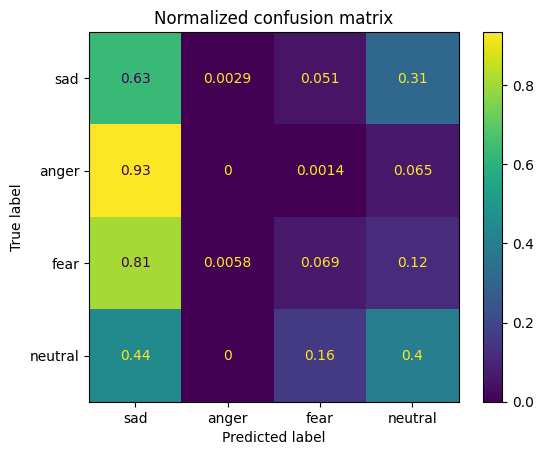

In [56]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Support Vector Machine

In [57]:
param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [15]:
# Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.97295673 0.97173782 0.97233915 0.96812989 0.96692724]
Mean accuracy: 0.9704181651556502
Test set accuracy: 0.35858585858585856
              precision    recall  f1-score   support

         sad       0.32      0.28      0.30       693
       anger       0.33      0.41      0.37       693
        fear       0.30      0.38      0.33       693
     neutral       0.59      0.37      0.45       693

    accuracy                           0.36      2772
   macro avg       0.38      0.36      0.36      2772
weighted avg       0.38      0.36      0.36      2772



Confusion matrix, without normalization
[[197 212 233  51]
 [188 282 123 100]
 [137 268 261  27]
 [102  88 249 254]]
Normalized confusion matrix
[[0.28427128 0.30591631 0.33621934 0.07359307]
 [0.27128427 0.40692641 0.17748918 0.14430014]
 [0.1976912  0.38672439 0.37662338 0.03896104]
 [0.14718615 0.12698413 0.35930736 0.36652237]]


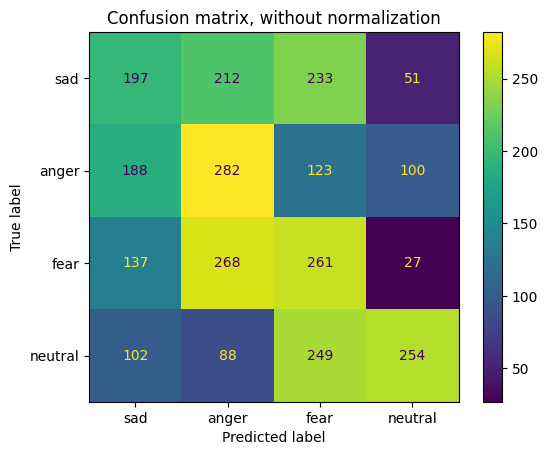

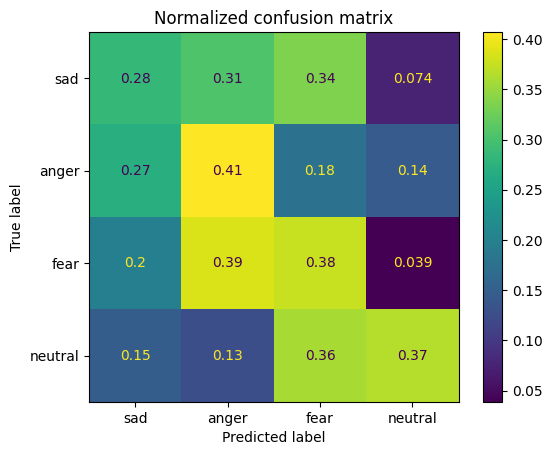

In [60]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### K-nearest neighbors

In [ ]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()
grid_search_lr = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn = knn.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

In [ ]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)